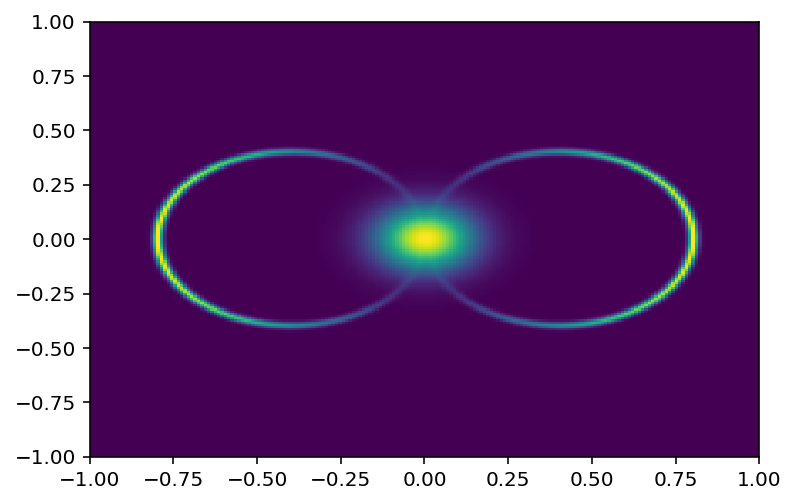

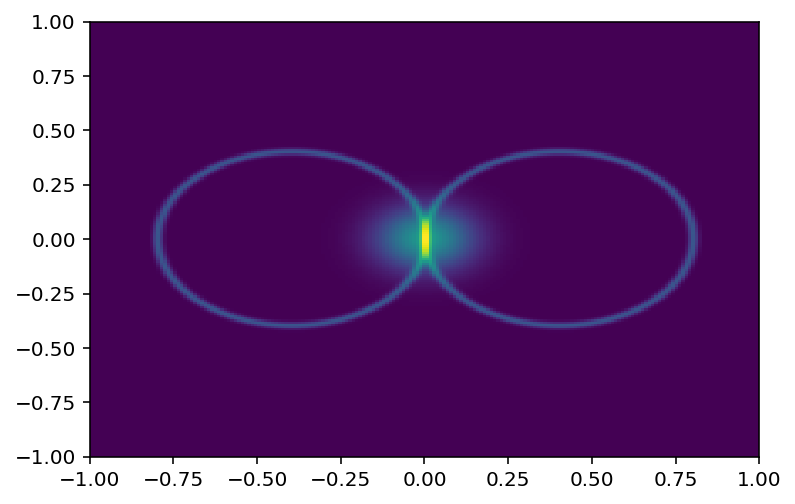

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

from scipy.special import erf


def gau1(x, mx, Sigmax):
    return (1 / (np.sqrt(2 * np.pi) * Sigmax)) * np.exp(-((x - mx) ** 2 / Sigmax **2 )/2.)


def gau2(x, y, mx, my, Sigmax, Sigmay):
    return (1 / (2 * np.pi * Sigmax * Sigmay)) * np.exp(-((x - mx) ** 2 / Sigmax ** 2 + (y - my) ** 2 / Sigmay ** 2) / 2)


def ring(x, y, cx, cy, Sigma, r0):
    return  gau1(np.sqrt((x - cx)**2 + (y - cy) ** 2), r0, Sigma) / (
    np.sqrt(Sigma**2) *((np.pi * r0 * erf(
         r0/(np.sqrt(2)*Sigma)))/Sigma +
      np.sqrt(2.*np.pi)* np.exp(-(r0**2/(2. * Sigma**2))) +
         np.pi *r0 * np.sqrt(1./Sigma**2)
     )
    )

def doubleFadedRingBlob(x, y, SigmaRing=0.01, SigmaBlob=0.1, ringRadius=0.4, fadeFraction=1.0):
    return (
 gau2(x, y, 0, 0, SigmaBlob, SigmaBlob)/2.
  +
  (1 + fadeFraction *(x - ringRadius)/ringRadius) * ring(x, y,
     ringRadius, 0, SigmaRing, ringRadius)/4.
  +
  (1 - fadeFraction *(x + ringRadius)/ringRadius) * ring(x,
     y, -ringRadius, 0, SigmaRing, ringRadius)/4.

 )


def densityPlot(XTest, YTest, ZTest):
   ''' Plot the density map using nearest-neighbor interpolation '''
   plt.pcolormesh(XTest, YTest, ZTest)
   plt.show()


# Sample data
sideTest = np.linspace(-1, 1, 200)
XTest,YTest = np.meshgrid(sideTest, sideTest)

ZTest = doubleFadedRingBlob(XTest, YTest)
densityPlot(XTest, YTest, ZTest)

ZTest = doubleFadedRingBlob(XTest, YTest, fadeFraction=0.)
densityPlot(XTest, YTest, ZTest)